# Project topic-

### The relation between covid infection rates and the political orientation of the population and their level of education.

$y$ = infection rates

$x_1$ = political orientation

$x_2$ = level of education

- potentially useful variable to add more context: The field of the people's education,i.e., a degree in arts vs a degree in chem e

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import scipy.optimize as sciopt
import pandas as pd
from scipy import stats

# import scipy.integrate as scint
# import statsmodels.api as sm
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

In [50]:
df = pd.read_excel("currentvotestats.xlsx")
for i in np.arange(3, 10, 2):
    df = df.drop(columns=[f"Unnamed: {i}"])

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Democrat voter count of counties')

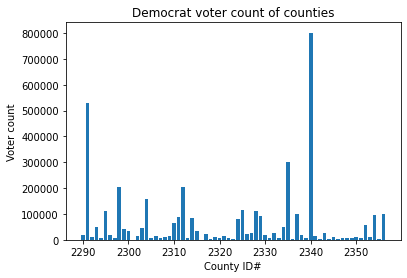

<IPython.core.display.Javascript object>

In [51]:
plt.bar(df["ID#"], df["Count of Democratic Voters"])
plt.xlabel("County ID#")
plt.ylabel("Voter count")
plt.title("Democrat voter count of counties")


Text(0.5, 1.0, 'Republican voter count of counties')

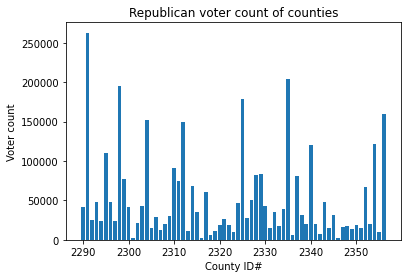

<IPython.core.display.Javascript object>

In [52]:
plt.bar(df["ID#"], df["Count of Republican Voters"])
plt.xlabel("County ID#")
plt.ylabel("Voter count")
plt.title("Republican voter count of counties")


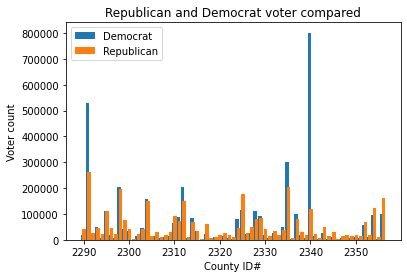

<IPython.core.display.Javascript object>

In [53]:
plt.bar(df["ID#"] - 0.15, df["Count of Democratic Voters"], label="Democrat")
plt.bar(df["ID#"] + 0.15, df["Count of Republican Voters"], label="Republican")
plt.xlabel("County ID#")
plt.ylabel("Voter count")
plt.title("Republican and Democrat voter compared")
plt.legend()

## For most counties in PA, the no. of voters for either party is determined by the total number of voters from that county,i.e., no drastic preferences for a single party.

There are three notable exceptions to the above statement, as seen on the plot

In [60]:
df2 = pd.read_excel("citizen data.xlsx", sheet_name="Data")


<IPython.core.display.Javascript object>

In [61]:
for i in np.arange(2, 161):

    if (i - 1) % 4 == 0:
        continue
    else:
        df2 = df2.drop(columns=[f"Unnamed: {i}"])
df2

,Unnamed: 0,"Adams County, Pennsylvania","Allegheny County, Pennsylvania","Armstrong County, Pennsylvania","Beaver County, Pennsylvania","Berks County, Pennsylvania","Blair County, Pennsylvania","Bucks County, Pennsylvania","Butler County, Pennsylvania","Cambria County, Pennsylvania",...,"Montgomery County, Pennsylvania","Northampton County, Pennsylvania","Northumberland County, Pennsylvania","Philadelphia County, Pennsylvania","Schuylkill County, Pennsylvania","Somerset County, Pennsylvania","Washington County, Pennsylvania","Westmoreland County, Pennsylvania","York County, Pennsylvania",Pennsylvania
0,NaN,Total,Total,Total,Total,Total,Total,Total,Total,Total,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
1,Label,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,...,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate
2,Citizens 18 years and over,"82,287","970,846","52,754","133,434","320,461","96,181","498,395","155,068","106,409",...,"642,943","243,662","73,121","1,131,361","113,201","60,022","166,955","286,397","350,990","9,918,163"
3,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 to 29 years,"14,639","181,346","7,675","21,411","62,403","16,382","82,036","26,388","18,260",...,"112,739","46,274","11,684","263,217","17,990","8,558","28,471","43,879","62,195","1,869,629"
5,30 to 44 years,"16,867","242,835","10,900","29,890","75,835","21,835","108,184","34,994","20,922",...,"154,753","54,357","16,223","324,659","25,143","13,075","36,226","58,124","84,707","2,329,111"
6,45 to 64 years,"27,969","305,116","18,912","45,209","107,818","32,004","182,052","54,986","36,107",...,"221,353","82,059","25,244","325,015","40,627","21,180","58,344","101,307","121,023","3,286,601"
7,65 years and over,"22,812","241,549","15,267","36,924","74,405","25,960","126,123","38,700","31,120",...,"154,098","60,972","19,970","218,470","29,441","17,209","43,914","83,087","83,065","2,432,822"
8,SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,"40,340","464,698","26,438","64,654","157,620","46,733","245,028","76,673","52,520",...,"310,793","119,365","36,960","520,440","58,954","31,644","81,365","141,125","172,865","4,835,481"


<IPython.core.display.Javascript object>

In [56]:
df3 = pd.read_csv("us-counties-recent.csv")
df3 = df3[df3["state"] == "Pennsylvania"]

<IPython.core.display.Javascript object>

In [57]:
means = np.array([])
for i in np.arange(42001, 42134, 2):
    dd = df3[df3["fips"] == i]
    means = np.concatenate([means, np.mean(dd["cases"])], axis=None)


dd = pd.DataFrame()
dd["fips"] = np.arange(42001, 42134, 2)
dd["cases_mean"] = means


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cases averaged between 17/09/22 and 17/10/22')

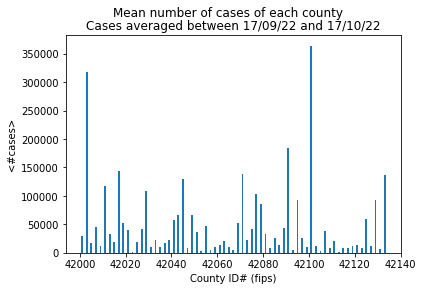

<IPython.core.display.Javascript object>

In [58]:
plt.bar(dd["fips"], dd["cases_mean"])
plt.xlabel("County ID# (fips)")
plt.ylabel("<#cases>")
plt.suptitle("Mean number of cases of each county")
plt.title("Cases averaged between 17/09/22 and 17/10/22")

## A very noticable feature is that all of the graphs show very similar behaviour. The most probable reason is that the features of a county are heavily dependant on the population of that county. So, the best way forward would be to normalise each county's data by its population.

***Note- I am yet to come up with a way to visualise the education data. Will think of that an update the repo